In [33]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 2.9 MB/s eta 0:00:00


In [21]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.5 MB/s eta 0:00:000m eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 30.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 32.3 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [3]:
!pip install sql

  Preparing metadata (setup.py) ... done
  Created wheel for sql: filename=sql-2022.4.0-py3-none-any.whl size=4307 sha256=ad0badb30dfeca6a3343d9a4893749840f4b689b9f1c1e08c990580f54d99a0e
  Stored in directory: /home/s026390869/.cache/pip/wheels/46/08/97/9539d985c524b7a3793898bbf6c95879a0e9daf5fc9ba49fd0
Successfully built sql


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
import psycopg2
import pandas.io.sql as sqlio
import sql 
from sqlalchemy import create_engine
import geopandas as gpd
import folium

In [2]:
con = psycopg2.connect(host='10.139.69.104', database='ibama',user='02639086901', password='hlw1990', port=1521)


In [3]:
data = sqlio.read_sql_query("""select 

    id_area,
	selection_cells,
	area_code,
	site_name,
	country,
	state_province,
	latitude,
	longitude,
	lat10,
	long10,
	altitude,
	alt_srtm,
	"domain",
	domn,
	ecounit,
	fitgeon,
	asp_ocean,
	thermic_realm,
	elevation_range,
	zonal_azonal,
	climatic_regime,
	leaf_flush,
	vegetation_physiognomy,
	vegetation_type,
	cdvg,
	main_vegetation,
	temp_correction,
	precip_correction,
	temp_ann,
	temp_day_rng,
	isotherm,
	temp_seas,
	temp_max,
	temp_min,
	temp_ann_rng,
	prec_ann,
	prec_wet_p,
	prec_dry_p,
	prec_seas,
	water_def_dur,
	water_def_sev,
	water_exc_dur,
	water_exc_sev,
	hyper_seas,
	days_frost,
	cloud_itcp,
	grassy_cover,
	surface_rockiness,
	ranked_rockiness,
	soil_texture_class,
	ranked_sand,
	soil_drainage_class,
	ranked_drainage,
	soil_water_storage,
	soil_fertility_class,
	ranked_tbs,
	salinity_class,
	ranked_salinity,
	geom_point as geometry

from   stage2_neotroptree.sites_auto """, con)

/home/s026390869/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
data.to_csv('sites.csv')

In [5]:
data = sqlio.read_sql_query("""select * from stage2_neotroptree.species_auto """, con)
data.to_csv('species.csv')

/home/s026390869/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
data = sqlio.read_sql_query("""select * from stage2_neotroptree.species_sites_auto """, con)
data.to_csv('species_sites.csv')

/home/s026390869/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
sites = gpd.read_file('sites.csv', GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")
sites.crs = 'epsg:4326'

#praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [8]:
sites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
sites.head()

,field_1,id_area,selection_cells,area_code,site_name,country,state_province,latitude,longitude,lat10,...,soil_texture_class,ranked_sand,soil_drainage_class,ranked_drainage,soil_water_storage,soil_fertility_class,ranked_tbs,salinity_class,ranked_salinity,geometry
0,0,8655,,NeaMX001,"Badiraguato, Cerro El zacate, bosque mixto de ...",México,Sinaloa,25°20’55”N,107°36’27”W,25.3486,...,Silty clay loam (20-30% sand),25,Excessively,5,41,Dystrophic (10-25% TBS),17,No salinity,0,POINT (-107.60750 25.34860)
1,1,8656,,NeaMX002,"Cosalá, bosque mixto de serranías",México,Sinaloa,24°23’11”N,106°41’17”W,24.3864,...,Silty clay loam (20-30% sand),25,Somewhat Excessively,20,49,Dystrophic (10-25% TBS),17,No salinity,0,POINT (-106.68810 24.38640)
2,2,8700,,NeaMX003,"Laguna Juárez, bosque mixto alto-montano",México,Baja California,32°01’24”N,115°54’34”W,32.0233,...,Silty clay loam (20-30% sand),25,Excessively,5,35,Dystrophic (10-25% TBS),17,No salinity,0,POINT (-115.90940 32.02330)
3,3,8701,,NeaMX004,"Sierra San Pedro Mártir, La Grulla, bosque mix...",México,Baja California,30°53’15”N,115°28’43”W,30.8875,...,Clay loam (30-40% sand),35,Excessively,5,33,Dystrophic (10-25% TBS),17,No salinity,0,POINT (-115.47860 30.88750)
4,4,8702,,NeaMX005,"Sierra de La Laguna, bosque mixto subalpino",México,Baja California Sur,23°32’25”N,109°57’28”W,23.5403,...,Clay loam (30-40% sand),35,Excessively,5,33,Dystrophic (10-25% TBS),17,No salinity,0,POINT (-109.95780 23.54030)


<AxesSubplot:>

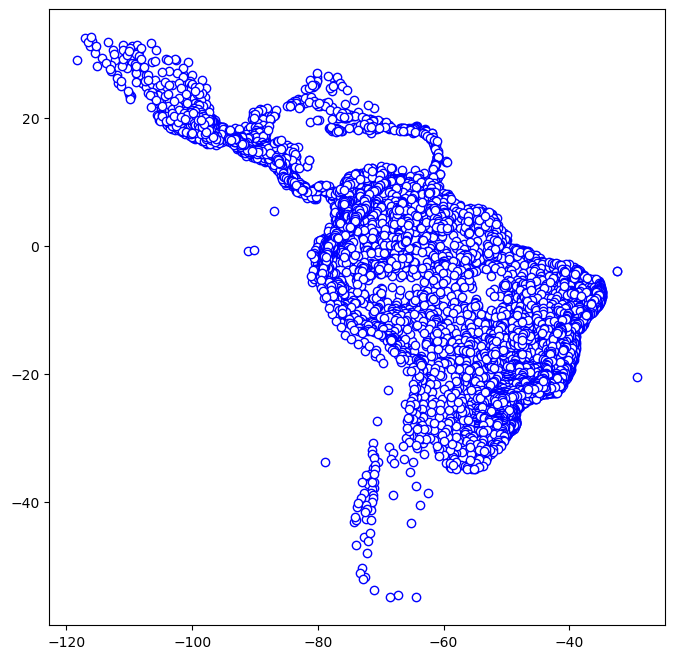

In [10]:
sites.plot(color='white', edgecolor='blue', figsize=(15,8))